In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from util import *

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
with open('./dataset/ck.plus.pickle','rb') as f:
    ck_data, ck_label = pickle.load(f)

In [3]:
target_classes = get_face_label()
target_classes

['😐', '😠', '😏', '😷', '😨', '😀', '😢', '😱']

In [4]:
%%time
image_hog_ck_data = []
feature_hog_ck_data = []

for image in ck_data :
    image = image.reshape(128,128)
    feature, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, block_norm='L1')
    feature_hog_ck_data.append(feature)
    image_hog_ck_data.append(hog_image)
    
ck_data_train, ck_data_test, ck_label_train, ck_label_test = train_test_split(feature_hog_ck_data, ck_label, test_size=0.25, random_state=42)

CPU times: user 2min 4s, sys: 1.1 s, total: 2min 5s
Wall time: 2min 5s


Text(0.5,1,'HOG Image')

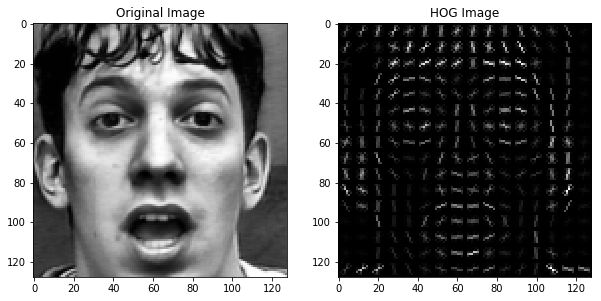

In [5]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(ck_data[0].reshape(128,128), cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image_hog_ck_data[0], cmap='gray')
plt.title('HOG Image')

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           😐       0.98      0.99      0.99       323
           😠       0.99      1.00      0.99        90
           😏       1.00      1.00      1.00        23
           😷       1.00      0.99      0.99        86
           😨       1.00      1.00      1.00        42
           😀       0.99      1.00      1.00       129
           😢       1.00      1.00      1.00        44
           😱       1.00      0.97      0.98       121

   micro avg       0.99      0.99      0.99       858
   macro avg       1.00      0.99      0.99       858
weighted avg       0.99      0.99      0.99       858

Accuracy:  0.9918414918414918
Normalized confusion matrix
CPU times: user 25.5 s, sys: 3.07 s, total: 28.5 s
Wall time

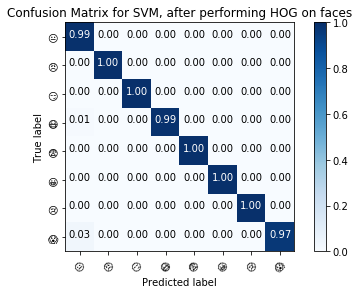

In [6]:
%%time

param_grid_svm =  {'kernel' : ['rbf', 'linear'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000], 'decision_function_shape': ['ovo', 'ovr']}

clf_svm = GridSearchCV(SVC(class_weight='balanced'), param_grid_svm, iid=True, n_jobs=-1)
clf_svm = clf_svm.fit(ck_data_train, ck_label_train)
ck_label_predict_svm = clf_svm.predict(ck_data_test)

print(clf_svm.best_estimator_)

print(classification_report(ck_label_test, ck_label_predict_svm, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict_svm))

cm = confusion_matrix(ck_label_test, ck_label_predict_svm, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for SVM, after performing HOG on faces', normalize=True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')
              precision    recall  f1-score   support

           😐       0.96      0.97      0.96       323
           😠       0.98      1.00      0.99        90
           😏       0.80      0.87      0.83        23
           😷       0.99      0.98      0.98        86
           😨       1.00      0.86      0.92        42
           😀       0.98      1.00      0.99       129
           😢       0.98      0.98      0.98        44
           😱       1.00      0.98      0.99       121

   micro avg       0.97      0.97      0.97       858
   macro avg       0.96      0.95      0.96       858
weighted avg       0.97      0.97      0.97       858

Accuracy:  0.9708624708624709
Normalized confusion matrix
CPU times: user 13 s, sys: 360 ms, total: 13.4 s
Wall time: 3min 7s


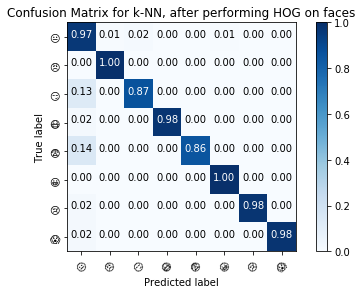

In [9]:
%%time

param_grid_knn =  {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

clf_knn = GridSearchCV(KNeighborsClassifier(),  param_grid_knn, iid=True, n_jobs=-1)

clf_knn = clf_knn.fit(ck_data_train, ck_label_train)
ck_label_predict_knn = clf_knn.predict(ck_data_test)
print(clf_knn.best_estimator_)

print(classification_report(ck_label_test, ck_label_predict_knn, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict_knn))

cm = confusion_matrix(ck_label_test, ck_label_predict_knn, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for k-NN, after performing HOG on faces', normalize=True)

              precision    recall  f1-score   support

           😐       0.98      0.99      0.98       323
           😠       0.99      1.00      0.99        90
           😏       1.00      0.96      0.98        23
           😷       1.00      0.98      0.99        86
           😨       1.00      1.00      1.00        42
           😀       0.98      1.00      0.99       129
           😢       1.00      1.00      1.00        44
           😱       1.00      0.97      0.98       121

   micro avg       0.99      0.99      0.99       858
   macro avg       0.99      0.99      0.99       858
weighted avg       0.99      0.99      0.99       858

Accuracy:  0.9883449883449883
Normalized confusion matrix
CPU times: user 16.4 s, sys: 356 ms, total: 16.8 s
Wall time: 8.4 s


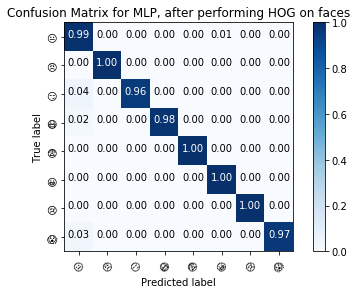

In [8]:
%%time

clf_mlp = MLPClassifier(random_state=42)
clf_mlp = clf_mlp.fit(ck_data_train, ck_label_train)
ck_label_predict_mlp = clf_mlp.predict(ck_data_test)

print(classification_report(ck_label_test, ck_label_predict_mlp, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict_mlp))

cm = confusion_matrix(ck_label_test, ck_label_predict_mlp, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for MLP, after performing HOG on faces', normalize=True)